Multivariatna analiza variance (MANOVA): Razširitev Anove, ki omogoča analizo več odvisnih spremenljivk hkrati. To bi lahko uporabili za preverjanje vpliva več dejavnikov na več odvisnih spremenljivk, na primer vpliva vključenosti v predšolsko izobraževanje, starosti otroka ob vključitvi, spola in socialno-ekonomskega statusa na doživljanje vrtca s strani staršev.

Analiza korelacije: Uporabite to, da preverite, ali obstajajo povezave med različnimi spremenljivkami, na primer med dolžino vključenosti v predšolsko izobraževanje in starostjo otroka ob vključitvi, med spolom otroka in doživljanjem vrtca s strani staršev.

Logistična regresija: Če vas zanima verjetnost, da se bo nek dogodek zgodil ali ne (npr. vključitev v predšolsko izobraževanje ali ne), lahko uporabite logistično regresijo. To bi lahko uporabili za razumevanje vpliva različnih dejavnikov na verjetnost vključitve v predšolsko izobraževanje.

Faktorska analiza: Za identifikacijo skupin povezanih spremenljivk lahko uporabite faktorsko analizo. To bi lahko uporabili za razumevanje skupnih vzorcev med različnimi vidiki doživljanja vrtca s strani staršev.

Strukturno enačbeno modeliranje (SEM): Če želite preučiti kompleksne vzorce med večimi spremenljivkami hkrati, bi lahko uporabili SEM. To bi lahko uporabili za razumevanje, kako se različni dejavniki medsebojno povezujejo in vplivajo na doživljanje vrtca s strani staršev.

In [46]:
import pandas as pd
df = pd.read_csv("precisceno_Ad1_za_analizo.csv")
df.head()

,spol,spol_starša,izob_matere,izob_očeta,število,izpolnjeval,vključen,status_matere,status_očeta,jezik,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,0,1,0,1,5.0,0,da,3,3,8,...,2.000000,2.000,2.000000,2.0,2.000,2.00,0.50,1.500000,2.0,2.000000
1,0,1,2,3,4.0,1,da,3,3,7,...,1.000000,1.000,1.000000,1.0,1.000,1.00,1.00,1.000000,1.0,1.000000
2,0,1,3,4,3.0,0,da,3,3,7,...,2.000000,1.750,1.857143,2.0,1.875,2.00,1.25,1.666667,2.0,1.833333
3,0,1,3,3,4.0,1,da,3,3,7,...,1.142857,0.250,0.142857,0.4,1.000,1.00,0.50,1.000000,2.0,1.583333
4,1,1,3,3,4.0,1,da,3,3,7,...,1.928571,1.125,1.428571,1.0,1.625,1.75,1.00,0.166667,1.0,0.833333


In [47]:
column_names = df.columns.tolist()

print(column_names)

unique_values = df['izpolnjeval'].unique()

print("Unique values in 'Column1':", unique_values)

['spol', 'spol_starša', 'izob_matere', 'izob_očeta', 'število', 'izpolnjeval', 'vključen', 'status_matere', 'status_očeta', 'jezik', 'OPP', 'drugo', 'age_in_months', 'starost_vkljucitev', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19']
Unique values in 'Column1': [0 1 2]


stevilo = st. druzinskih clanov

izpolnjeval = kateri otrok po vrsti (prvorojenec, ...)

vkljucen = vklj. v vrtec... kasneje desno stolpec tudi v mesecih koliko casa

status = brezposelen....

OPP = posebne potrebe

In [48]:
# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')


V tem df imamo seveda vključene same NaN, saj so izpolnjevali V10-...

In [49]:
df = df.drop(columns=['vključen'])
df = df.drop(columns=['drugo'])#dropamo se drugo
df.head()

,spol,spol_starša,izob_matere,izob_očeta,število,izpolnjeval,status_matere,status_očeta,jezik,OPP,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,0,1,0,1,5.0,0,3,3,8,1,...,2.000000,2.000,2.000000,2.0,2.000,2.00,0.50,1.500000,2.0,2.000000
1,0,1,2,3,4.0,1,3,3,7,1,...,1.000000,1.000,1.000000,1.0,1.000,1.00,1.00,1.000000,1.0,1.000000
2,0,1,3,4,3.0,0,3,3,7,1,...,2.000000,1.750,1.857143,2.0,1.875,2.00,1.25,1.666667,2.0,1.833333
3,0,1,3,3,4.0,1,3,3,7,1,...,1.142857,0.250,0.142857,0.4,1.000,1.00,0.50,1.000000,2.0,1.583333
4,1,1,3,3,4.0,1,3,3,7,1,...,1.928571,1.125,1.428571,1.0,1.625,1.75,1.00,0.166667,1.0,0.833333


In [50]:
num_rows = df.shape[0]
print(f"Number of rows in the dataframe: {num_rows}")

Number of rows in the dataframe: 520


In [51]:
import numpy as np

# Count NaN values in each column
nan_count = df.isna().sum()

# Count infinity values in each column
inf_count = df.isin([np.inf, -np.inf]).sum()

# Total count of NaN, inf, or -inf values in the DataFrame
total_count = nan_count.sum() + inf_count.sum()

print("NaN Count:")
print(nan_count)
print("\nInfinity Count:")
print(inf_count)
print("\nTotal NaN, Inf, and -Inf Count:", total_count)

NaN Count:
spol                  0
spol_starša           0
izob_matere           0
izob_očeta            0
število               0
izpolnjeval           0
status_matere         0
status_očeta          0
jezik                 0
OPP                   0
age_in_months         0
starost_vkljucitev    0
V10                   0
V11                   0
V12                   0
V13                   0
V14                   0
V15                   0
V16                   0
V17                   0
V18                   0
V19                   0
dtype: int64

Infinity Count:
spol                  0
spol_starša           0
izob_matere           0
izob_očeta            0
število               0
izpolnjeval           0
status_matere         0
status_očeta          0
jezik                 0
OPP                   0
age_in_months         0
starost_vkljucitev    0
V10                   0
V11                   0
V12                   0
V13                   0
V14                   0
V15                   0

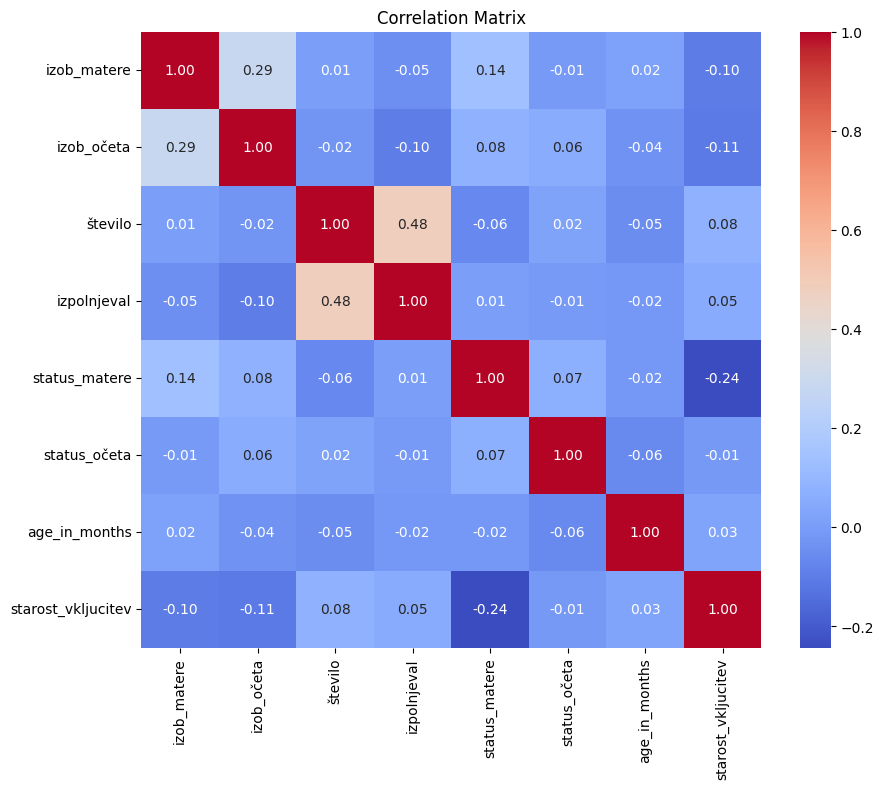

In [52]:
# Selecting ordinal and continuous features
ordinal_features = ['izob_matere', 'izob_očeta', 'število', 'izpolnjeval', 'status_matere', 'status_očeta']
continuous_features = ['age_in_months', 'starost_vkljucitev']

# Concatenating ordinal and continuous features
df_combined = pd.concat([df[ordinal_features], df[continuous_features]], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_combined.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


In [53]:
print(df.columns)

Index(['spol', 'spol_starša', 'izob_matere', 'izob_očeta', 'število',
       'izpolnjeval', 'status_matere', 'status_očeta', 'jezik', 'OPP',
       'age_in_months', 'starost_vkljucitev', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V15', 'V16', 'V17', 'V18', 'V19'],
      dtype='object')


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


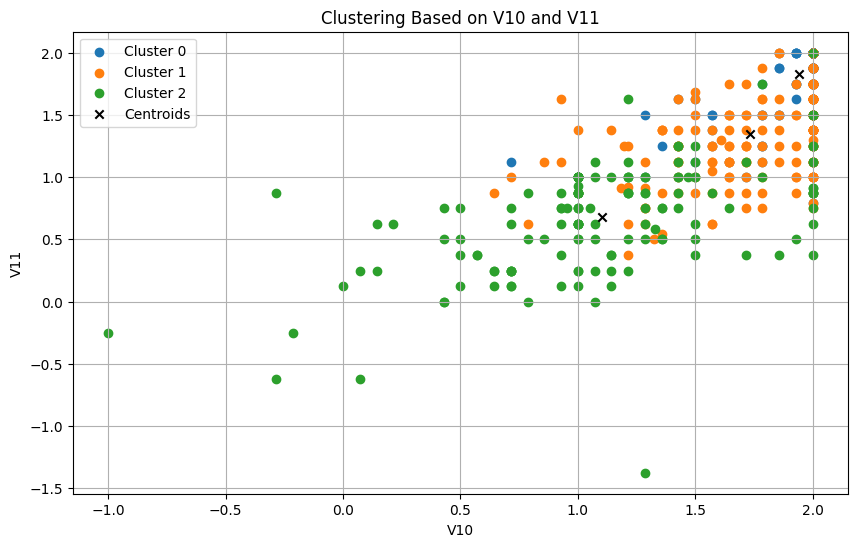

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert data to DataFrame
#df = pd.DataFrame(df)

# Columns to include in clustering
columns_to_include = ['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19']
X = df[columns_to_include]

# Number of clusters
k = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=k)

# Fit model to data
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to DataFrame
df['cluster'] = labels

# Visualize clusters
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(df[df['cluster'] == i]['V10'], df[df['cluster'] == i]['V11'], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')
plt.title('Clustering Based on V10 and V11')
plt.xlabel('V10')
plt.ylabel('V11')
plt.legend()
plt.grid(True)
plt.show()

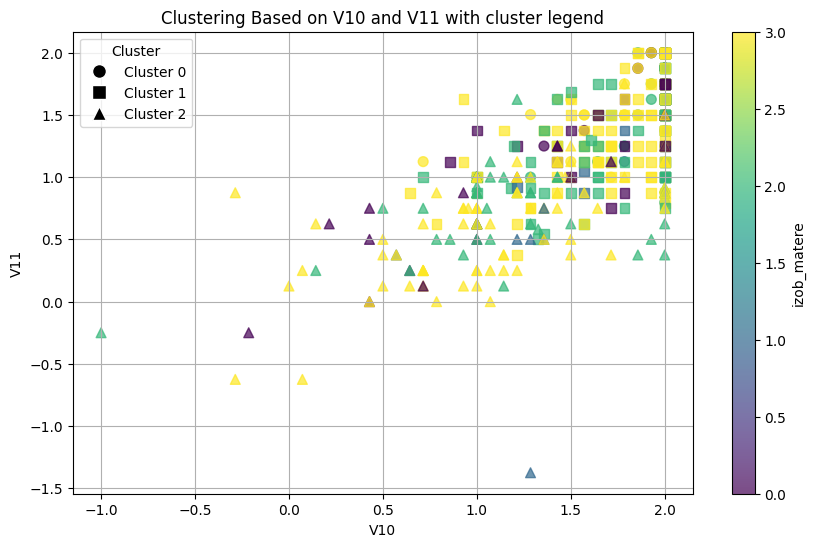

In [60]:
# Define shapes for each cluster
shapes = ['o', 's', '^']  # circle, square, triangle

# Visualize clusters with hue based on 'izob_matere' column
plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['V10'], cluster_data['V11'], label=f'Cluster {i}', s=50, alpha=0.7, c=cluster_data['izob_matere'], cmap='viridis', marker=shapes[i])

# Create a separate legend for clusters with black shapes
legend_handles_shapes = [Line2D([0], [0], marker=shape, color='w', label=f'Cluster {i}', markersize=10, markerfacecolor='black') for i, shape in enumerate(shapes)]
plt.legend(handles=legend_handles_shapes, title='Cluster', loc='upper left')

plt.colorbar(label='izob_matere')
plt.title('Clustering Based on V10 and V11 with cluster legend')
plt.xlabel('V10')
plt.ylabel('V11')
plt.grid(True)
plt.show()